Australia rain dataset

In [10]:
import numpy as np
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline  
plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test,n_jobs=-1, random_state=42)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 4))

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 1.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.set_ylabel('Importance')
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                        box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=5)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.show()
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        mean_rmse[model_name] = np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values(),color = colors)
        plt.title('F1 score for Different Models')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")
rain = pd.read_csv("./datasets/weatherAUS.csv")

rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])
#Filling the missing values for continuous variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [3]:
rain=rain.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.3, random_state=42)


In [4]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print("F1 score for logistic regression is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  84.1880929465145 %
F1 score for logistic regression is : 56.54364529537725 %


In [5]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)
predicted = xgbc.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  85.84032265456713 %
F1 score for XGBoost is : 62.571930462172155 %


In [7]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf.fit(x_train, y_train)  
predicted = rf.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print("F1 score for Random Forest is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Random Forest is :  85.4622118337229 %
F1 score for Random Forest is : 59.929257200606365 %


In [8]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma='auto',degree=1,class_weight='balanced')
svm.fit(x_train, y_train)  
predicted = svm.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted.round())*100, "%")
print("F1 score for SVM is :",f1_score(y_test, predicted,)*100, "%")


The accuracy of SVM is :  79.14661533525826 %


In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000,hidden_layer_sizes=200)
mlp.fit(x_train ,y_train)
preds = mlp.predict(x_test)
print("MLP : ", accuracy_score(y_test, predicted.round())*100, "%")
print("F1 score for MLP is :",f1_score(y_test, predicted,)*100, "%")

MLP :  79.14661533525826 %
F1 score for MLP is : 61.60985487681404 %


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

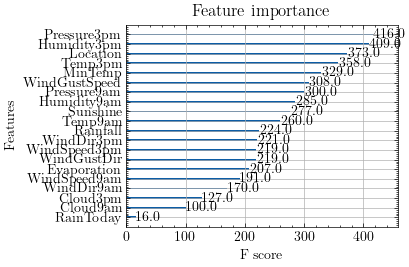

In [9]:
from xgboost import XGBClassifier, plot_importance
plot_importance(xgbc)

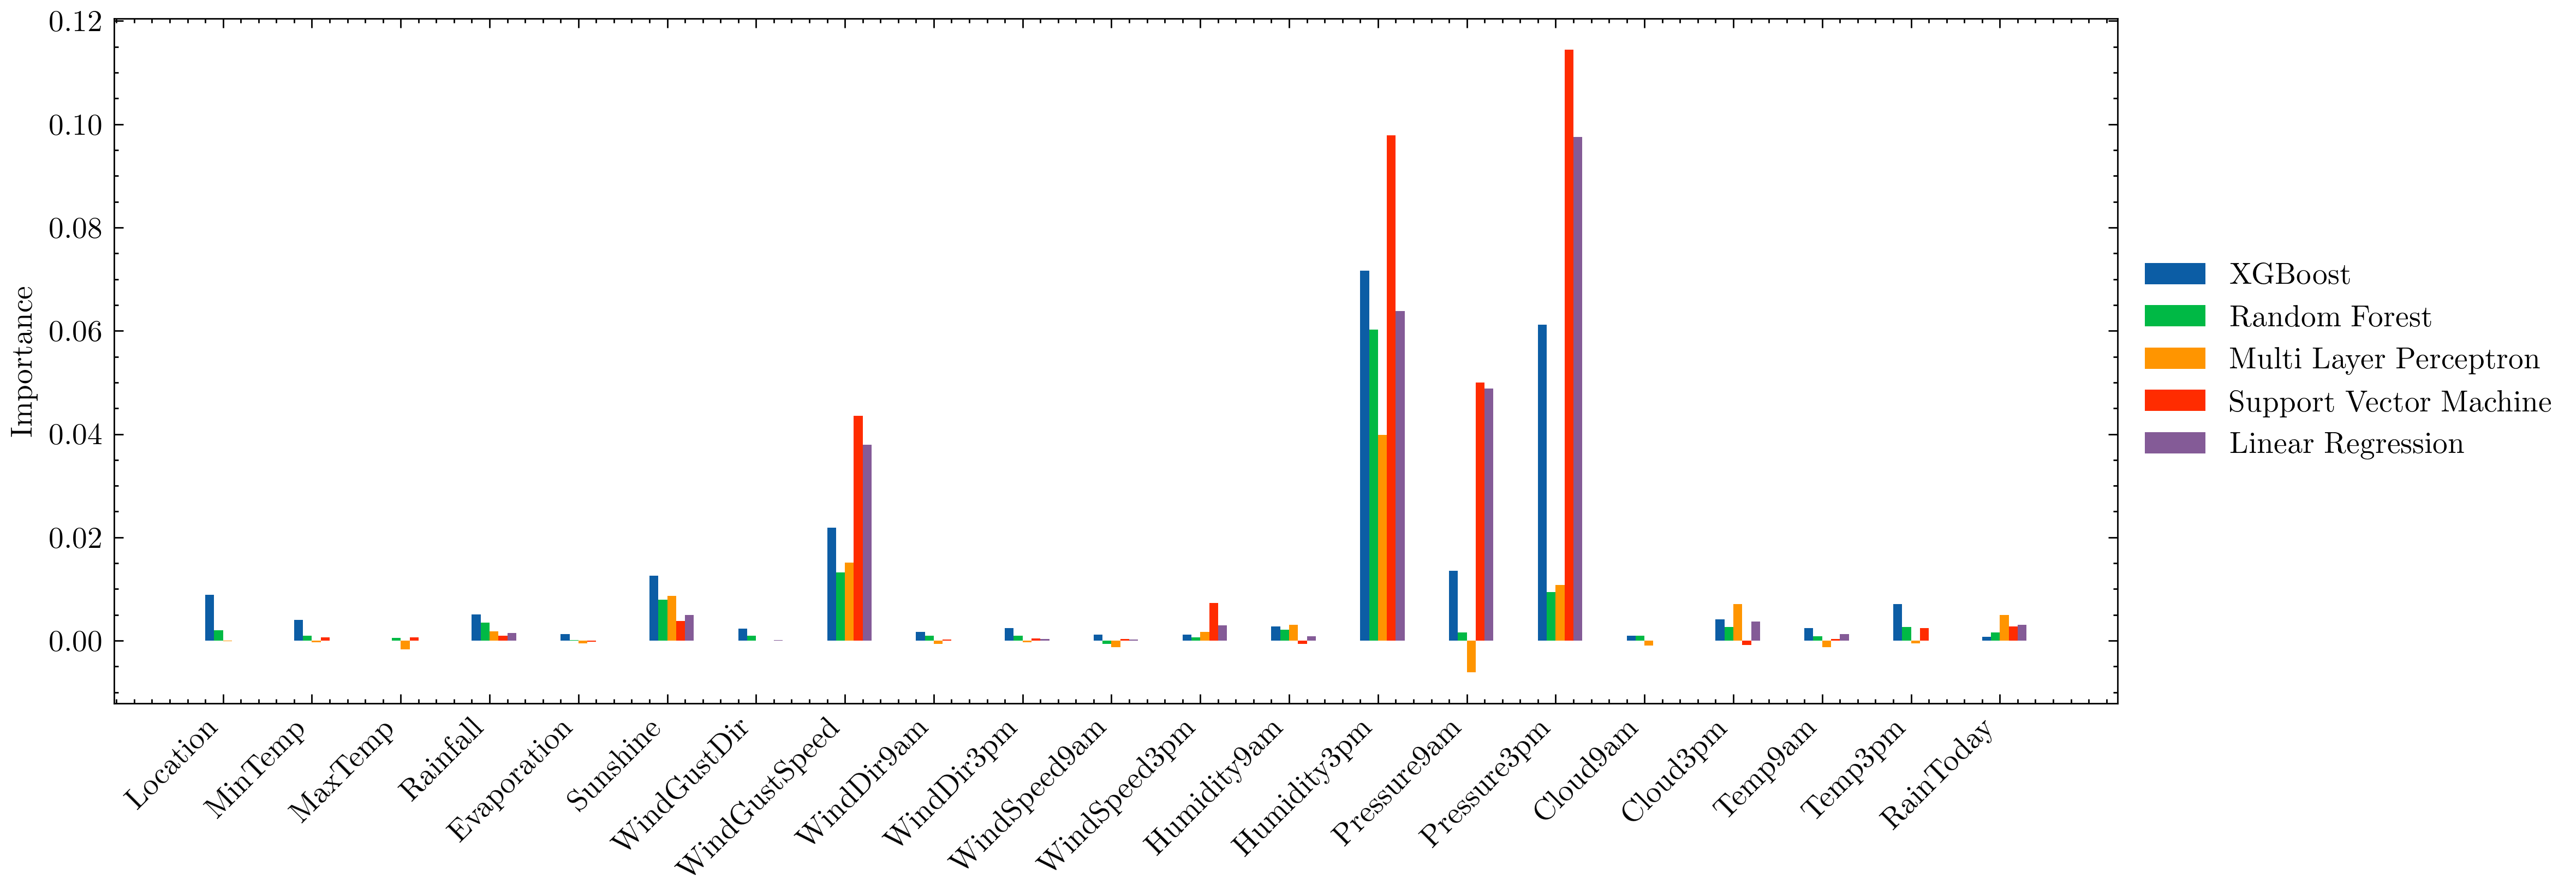

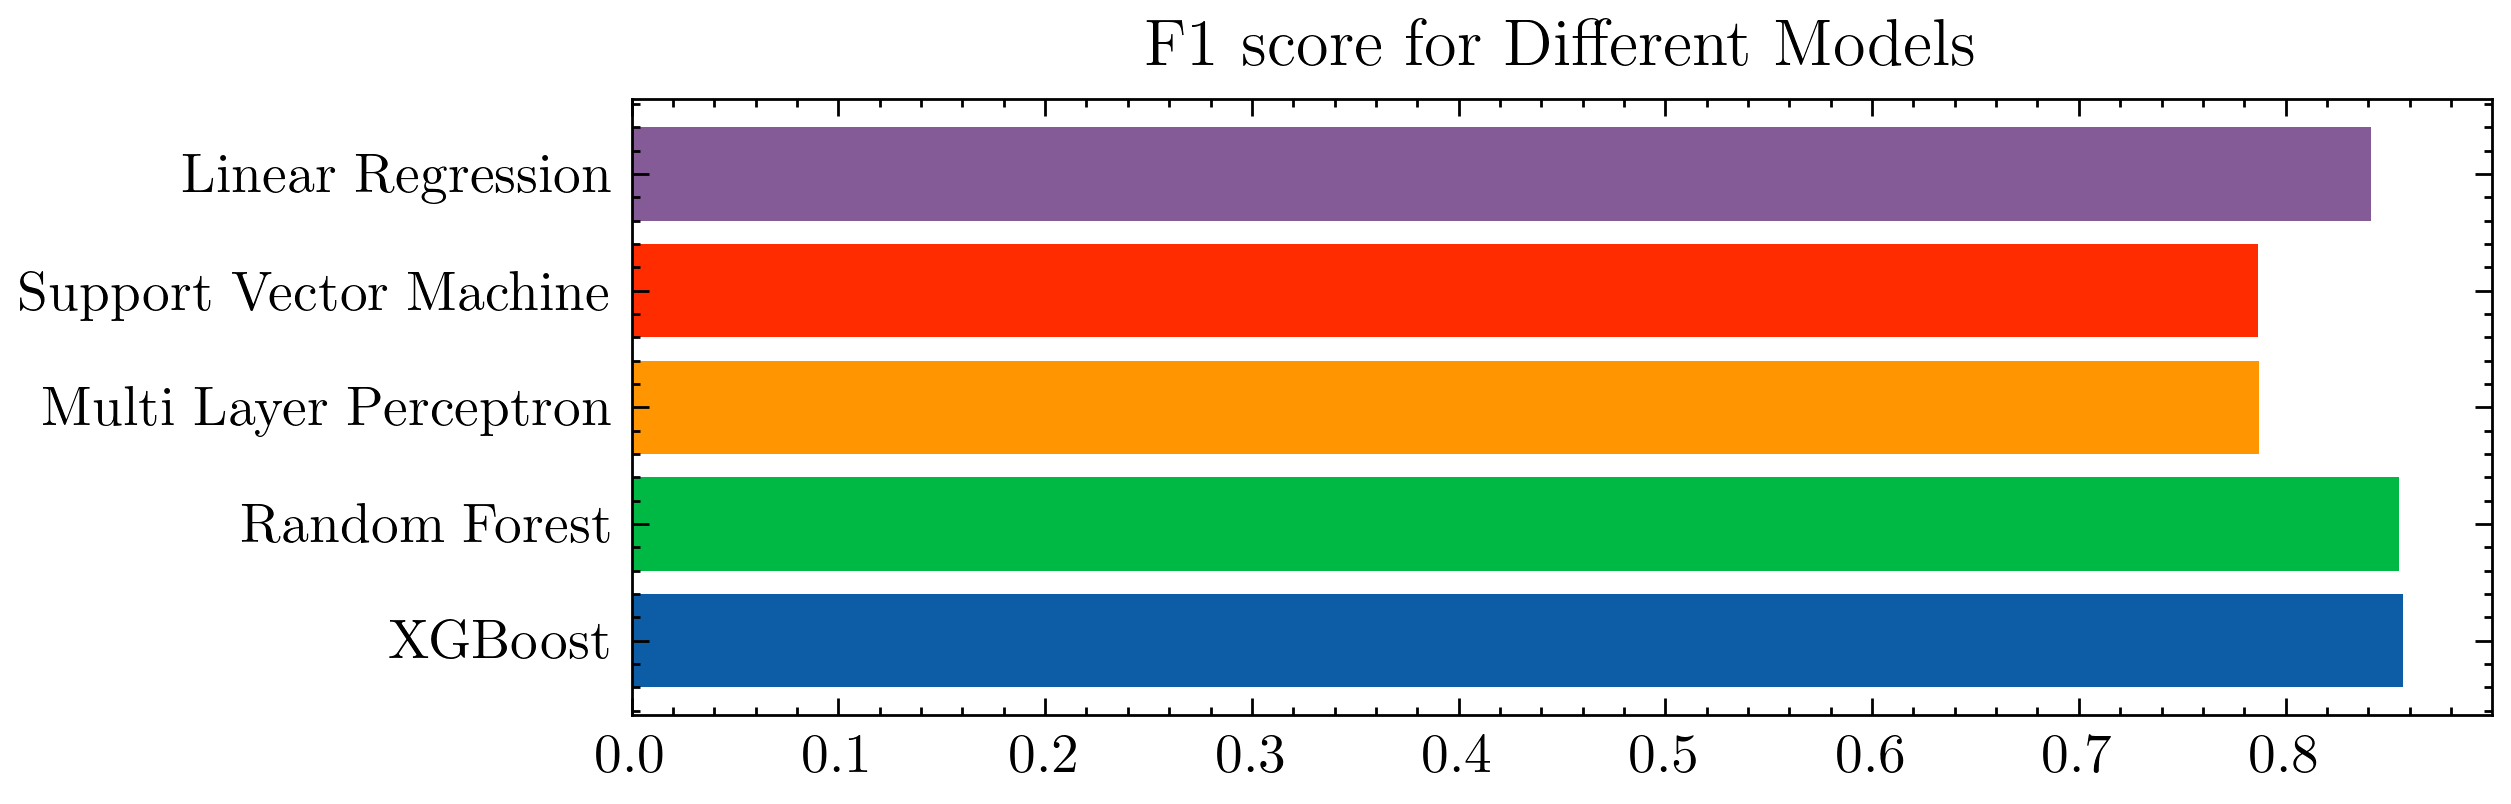

In [11]:
# Example usage with custom colors
models = {
    'XGBoost': xgbc,
    'Random Forest': rf,
    'Multi Layer Perceptron': mlp,
    'Support Vector Machine': svm,
    "Linear Regression":model
}


# Specify custom colors for each model
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Extract 10 distinct colors from the color cycle
num_colors = 10
custom_colors = color_cycle[:num_colors]
plot_feature_importance_comparison(models, x_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models,x_train,y_train,custom_colors)

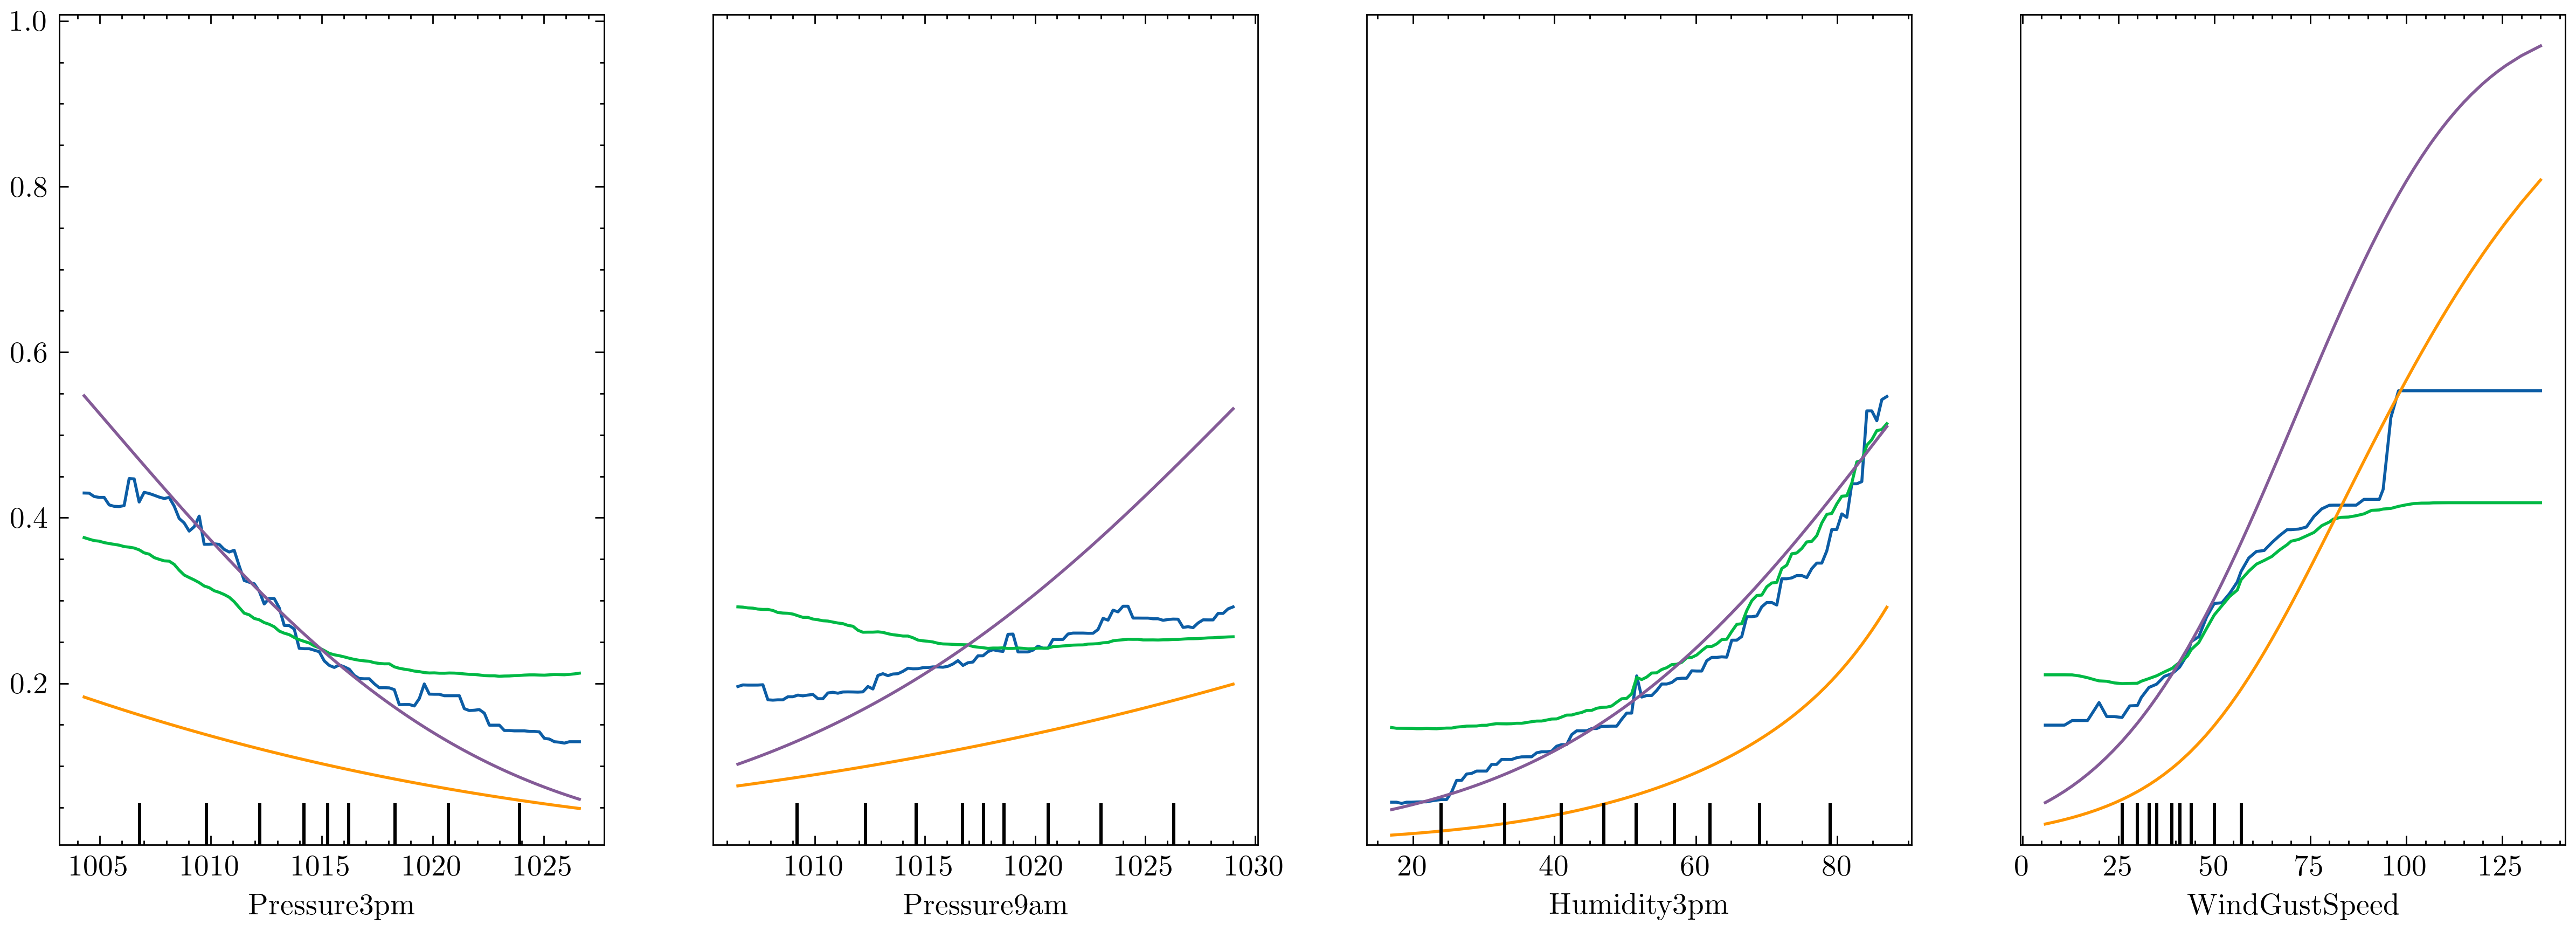

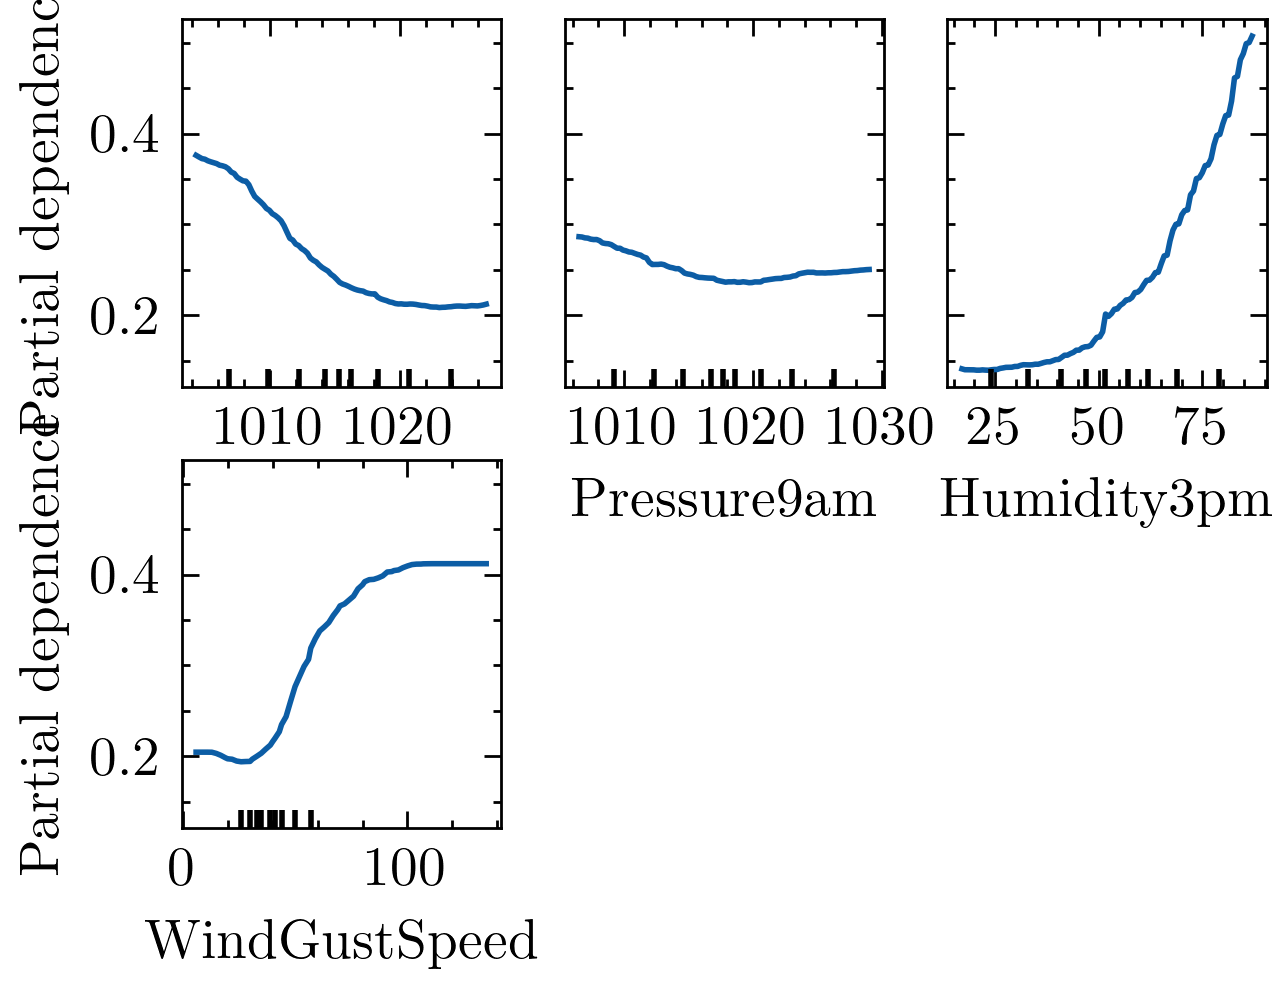

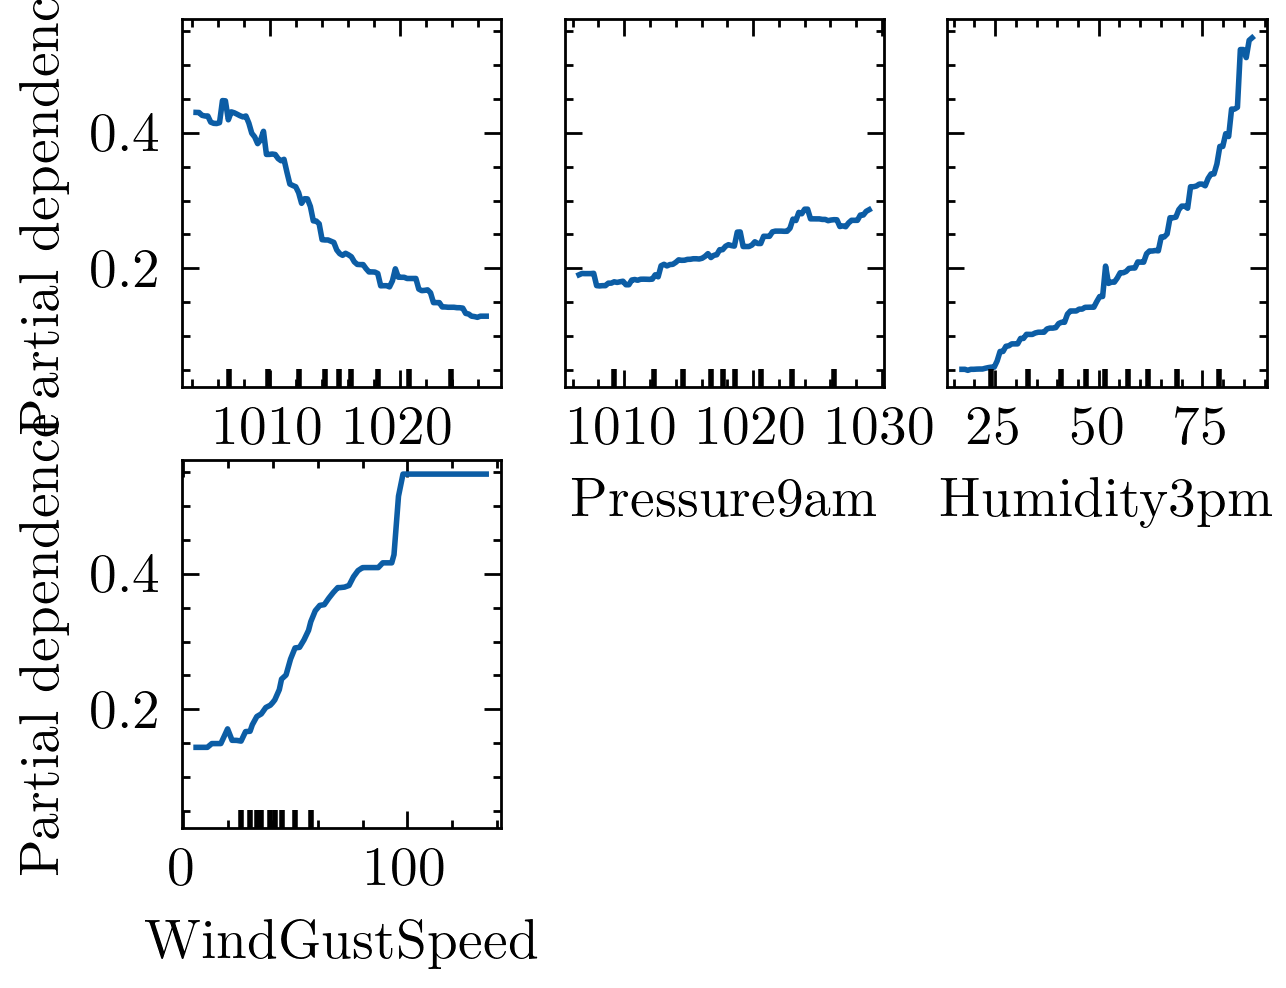

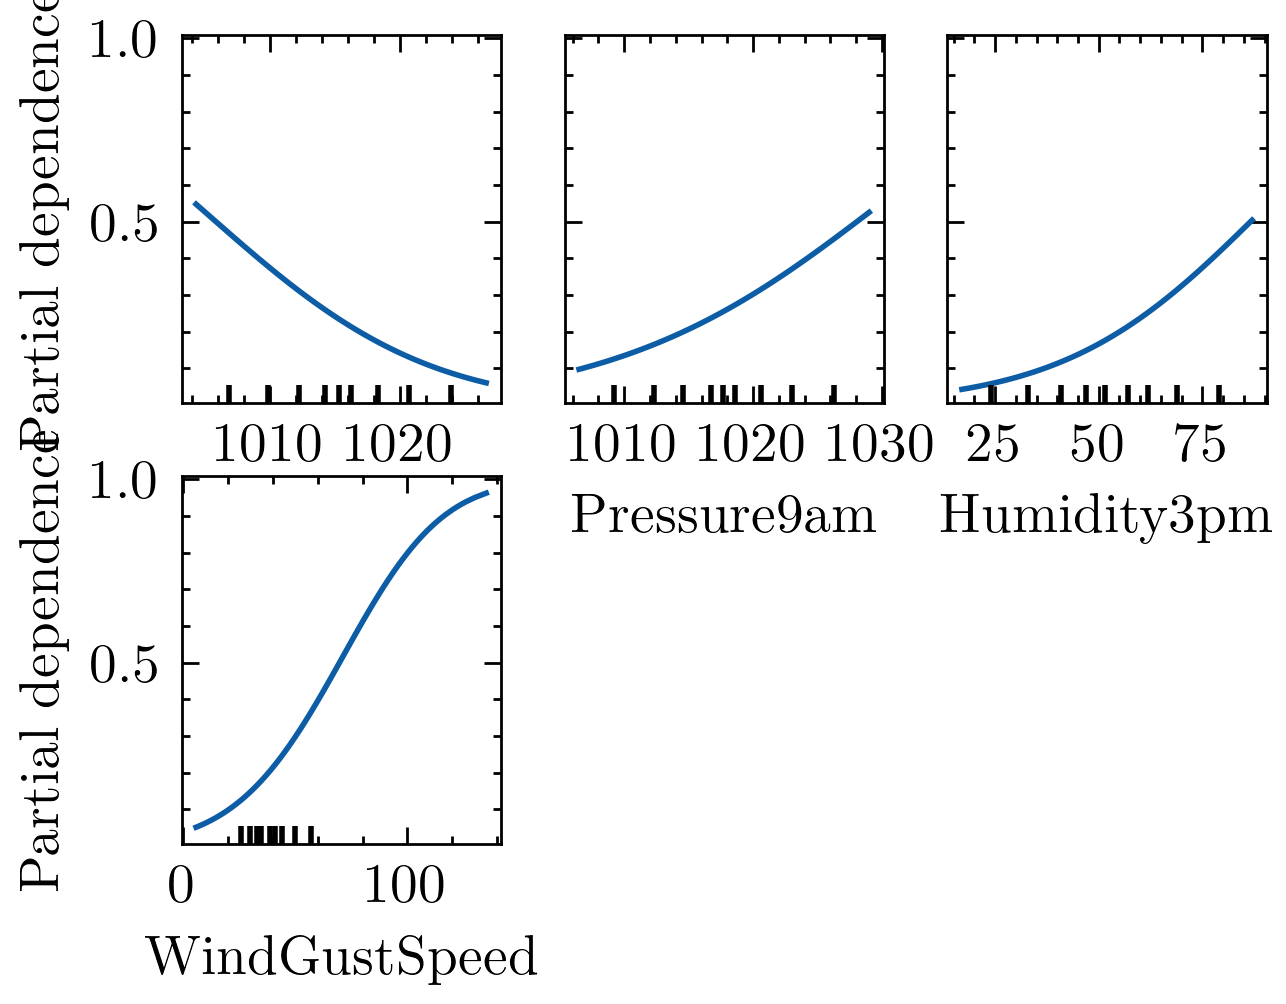

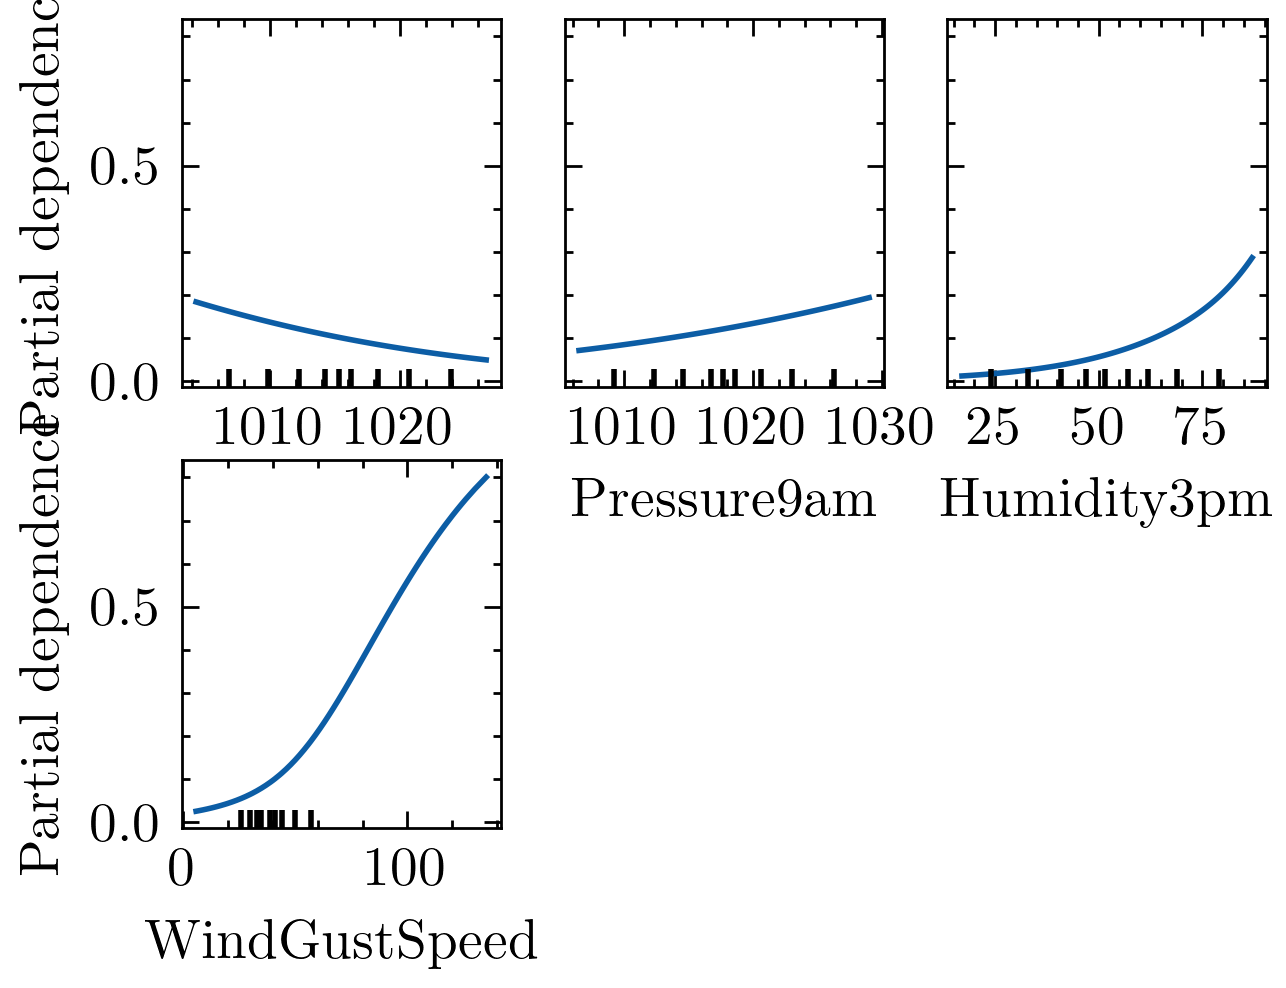

In [17]:
from sklearn.inspection import PartialDependenceDisplay
with plt.style.context('science'):
    features = ["Pressure3pm", "Pressure9am", "Humidity3pm", "WindGustSpeed"]
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(
        1, 4, figsize=(15, 5))  # (rows, columns, index)
    rf_disp = PartialDependenceDisplay.from_estimator(
        rf, x_train, features=features, feature_names=x_train.columns)
    xgb_disp = PartialDependenceDisplay.from_estimator(
        xgbc, x_train, features=features, feature_names=x_train.columns)
    # svm_disp = PartialDependenceDisplay.from_estimator(
    #     svm, x_train, features=features, feature_names=x_train.columns)
    lr_disp = PartialDependenceDisplay.from_estimator(
        model, x_train, features=features, feature_names=x_train.columns)
    mlrp_disp = PartialDependenceDisplay.from_estimator(
        mlp, x_train, features=features, feature_names=x_train.columns)
    # svm_disp.plot(ax=[ax1, ax2, ax3, ax4],
    #               line_kw={"label": "NN", "color": custom_colors[3]})
    xgb_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={
                  "label": "xgboost", "color": custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={
                 "label": "random forest", "color": custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={
                   "label": "NN", "color": custom_colors[2]})
    lr_disp.plot(ax=[ax1, ax2, ax3, ax4],
                 line_kw={"label": "NN", "color": custom_colors[4]})
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    for ax in [ax1, ax2, ax3, ax4,]:
        ax.set_ylabel('')
    for ax in [ax2, ax3, ax4]:
        ax.set_ylim(0, 1)
        ax.set_yticks([])

    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(
            zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    # fig.legend(lines, labels, fontsize='small')
    plt.show()